In [6]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from CCio import load_double_power_file

from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

In [7]:
%matplotlib inline

auto_plot_style({"font.size":20})

In [61]:
def load(folder, cut=-3):
    files  = glob.glob(folder + "state*signal*")
    print(len(files))
    files  = sorted(files, key=lambda x: int(os.path.basename(x).split("_")[1]))
    datas  = [load_double_power_file(filename, cut) for filename in files]
    datas  = [[datas[k] for k in range(i, len(datas), 3)] for i in range(3)]
    return datas

In [62]:
folder1 = "/home/gonzalo/data/CC/empty_2021_02_23_12_56_36_864000/"
folder2 = "/home/gonzalo/data/CC/empty_2021_02_23_18_40_10_684000/"
folder3 = "/home/gonzalo/data/CC/empty_2021_02_24_18_13_47_984000/"
folder4 = "/home/gonzalo/data/CC/empty_2021_02_24_21_21_55_065000/"

datas1  = load(folder1)
datas2  = load(folder2)
datas3  = load(folder3)
datas4  = load(folder4)

datas  = datas1, datas2, datas3, datas4
exps   = 0.2, 2, 10
exwls  = np.concatenate([np.arange(800, 390, -10), np.arange(400, 240, -10)])

171
171
171
171


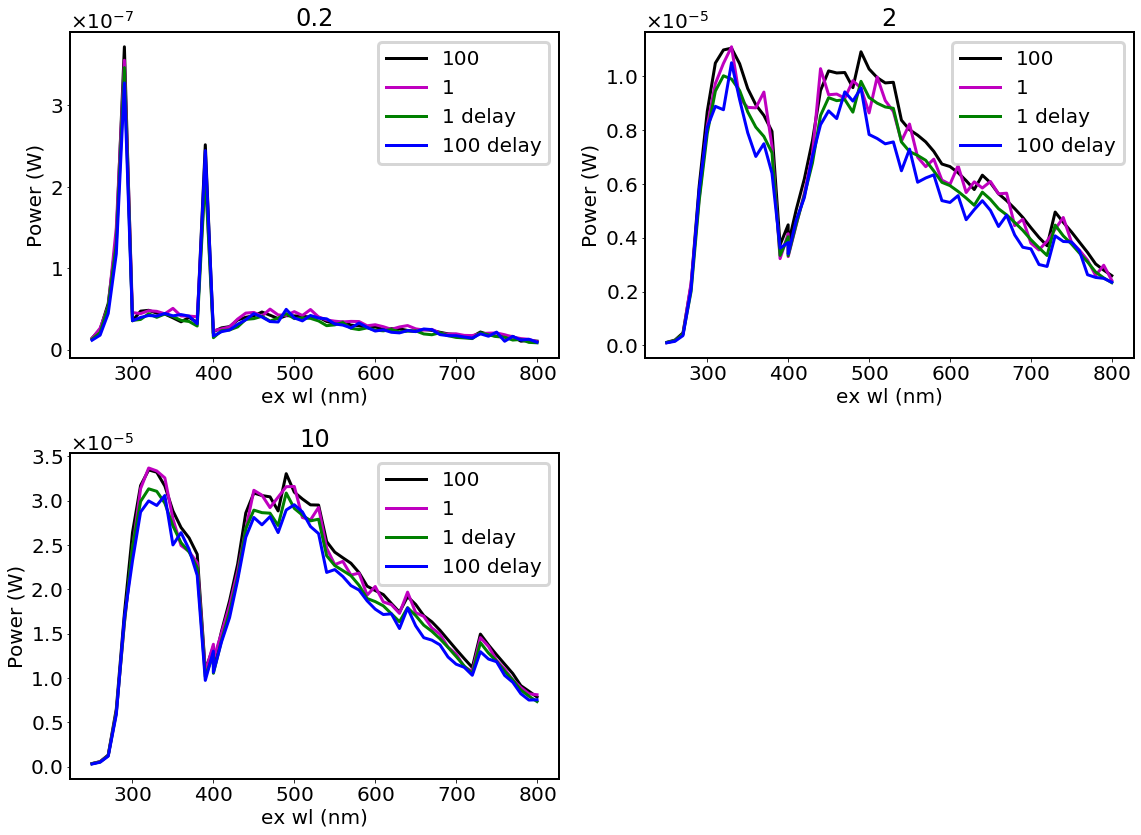

In [63]:
plt.figure(figsize=(16, 12))
k = 1
for exp, data1, data2, data3, data4 in zip(exps, *datas):
    pws1 = [d[1].mean for d in data1]
    pws2 = [d[1].mean for d in data2]
    pws3 = [d[1].mean for d in data3]
    pws4 = [d[1].mean for d in data4]
    
    plt.subplot(2, 2, k); k+= 1
    plt.plot(exwls, pws1, label="100")
    plt.plot(exwls, pws2, label="1")
    plt.plot(exwls, pws3, label="1 delay")
    plt.plot(exwls, pws4, label="100 delay")
    plt.xlabel("ex wl (nm)")
    plt.ylabel("Power (W)")
    plt.title(str(exp))
    plt.legend()
    
plt.tight_layout()

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


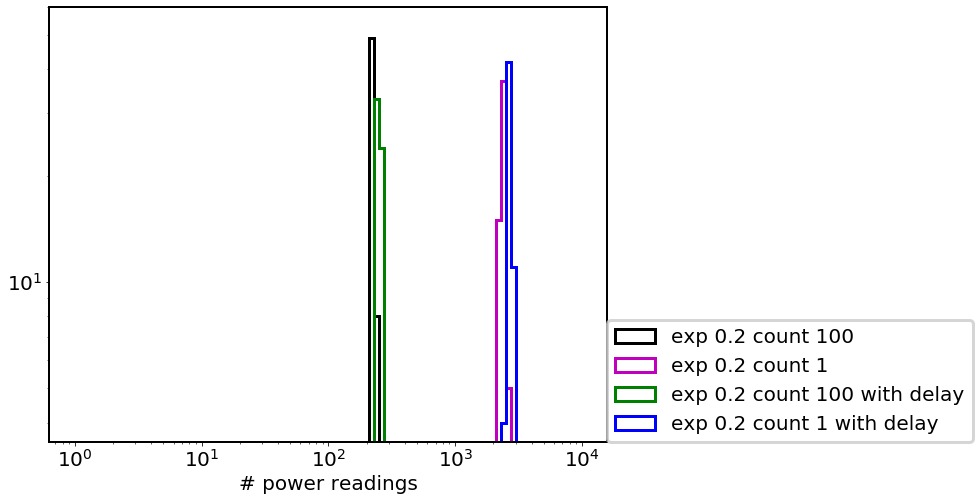

In [65]:
bins = np.logspace(0, 4, 101)
for exp, data1, data2, data3, data4 in zip(exps, *datas):
    npoints1 = [len(d[1].power) for d in data1]
    npoints2 = [len(d[1].power) for d in data2]
    npoints3 = [len(d[1].power) for d in data3]
    npoints4 = [len(d[1].power) for d in data4]
    plt.hist(npoints1, bins, histtype="step", label=f"exp {exp} count 100")
    plt.hist(npoints2, bins, histtype="step", label=f"exp {exp} count 1")
    plt.hist(npoints3, bins, histtype="step", label=f"exp {exp} count 100 with delay")
    plt.hist(npoints4, bins, histtype="step", label=f"exp {exp} count 1 with delay")
    plt.xlabel("# power readings")
    break
plt.xscale("log")
plt.yscale("log")
plt.ylim(0, 60)
plt.legend(loc=(1.0, 0.0));

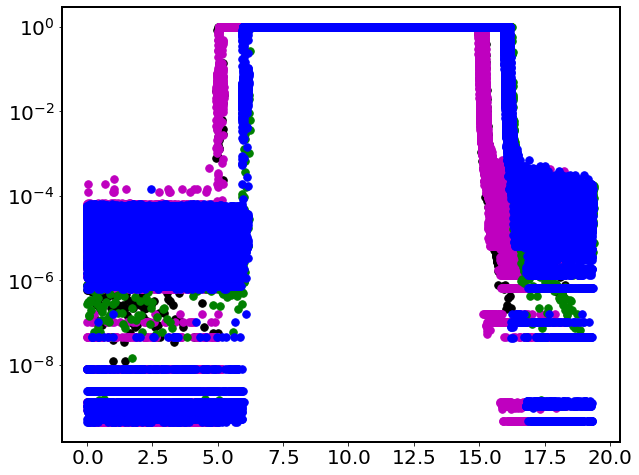

In [68]:
for color, data in zip("kmgb", datas):
    for (_, d) in data[2]:
        plt.plot(d.time - d.time.min(), d.power/d.power.max(), "." + color)
        plt.yscale("log")

<Figure size 720x576 with 0 Axes>

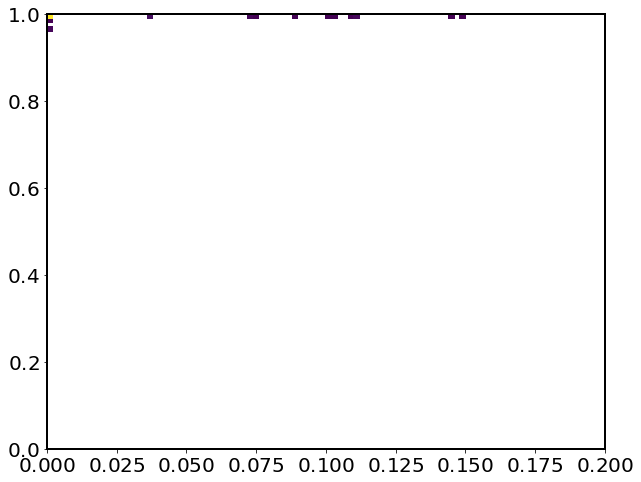

<Figure size 720x576 with 0 Axes>

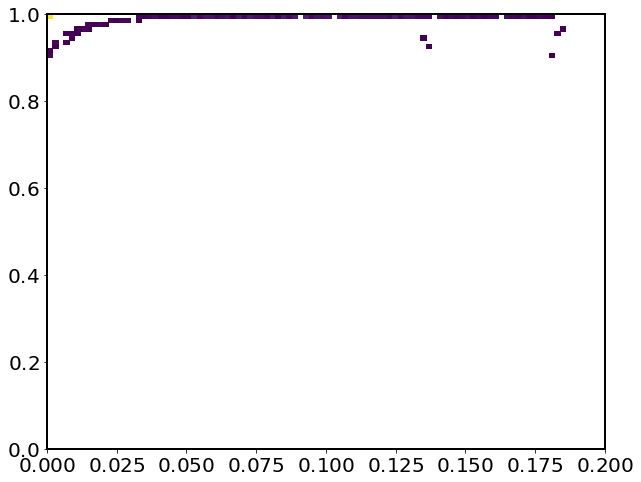

<Figure size 720x576 with 0 Axes>

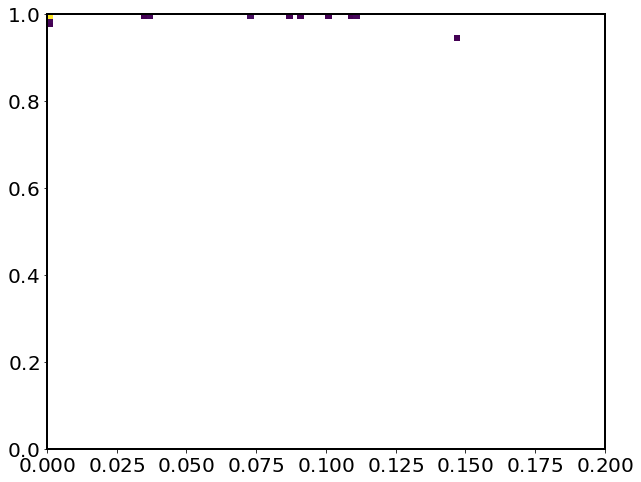

<Figure size 720x576 with 0 Axes>

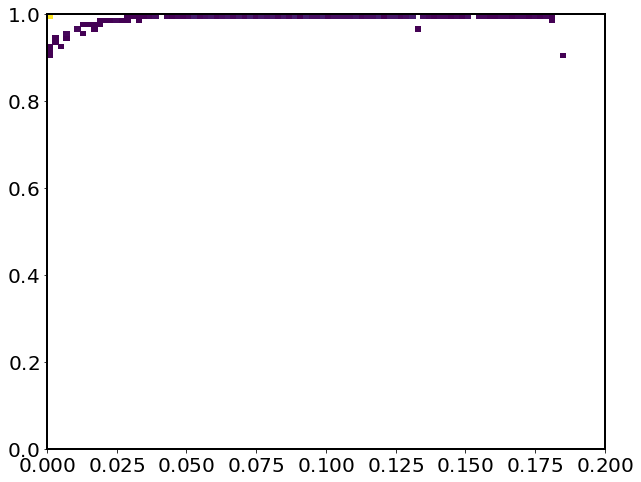

In [60]:
for color, data in zip("kmgb", datas):
    plt.figure()
    t = []
    p = []
    for (_, d) in data[0]:
        t.extend(d.time - d.time.min())
        p.extend(d.power/d.power.max())
        
    plt.figure()
    plt.hist2d(t, p, (np.linspace(0, 0.2, 101), np.linspace(0, 1, 101)), cmin=1)

In [ ]:
import time

In [19]:
%%timeit
time.time()

90 ns ± 1.03 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [26]:
import time

In [20]:
t0 = time.time()
n = 0
while time.time() - t0 < 10:
    time.time()
    [].append(1)
    time.sleep(0)
    n += 1
t1 = time.time()
print((t1 - t0) / n)

1.238245780568704e-06
